<span style="color:Red; font-size: 15pt">1. Introduction </span>

<span style="color:Green"> The sinking of the RMS Titanic after coloding with an iceberg killing 
1502 out of 2224 passengers and crew.
<br> 
In this challenge here it is asked to complete the analysis of what sort of people were likely to survive. 
such as women,children and upper-class 
</span>

<span style="color:Green"> The data has been split into two groups 
 * training set 
 * test set 
</span> 

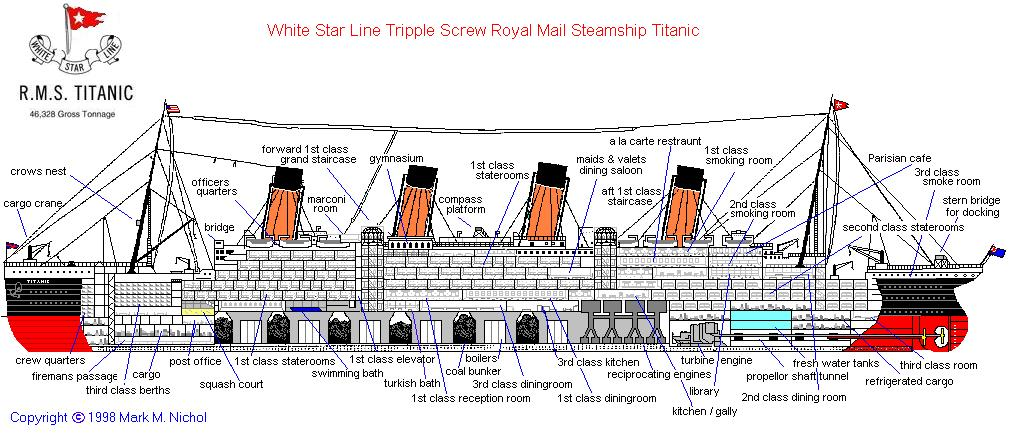

In [1]:
from IPython.display import Image
Image('Titanic-Copy1.jpg')

<span style="color:Blue"> List Of Libraries To Get The Analysis Of Titanic Suviour </span>

In [2]:
import pandas as pd
import numpy as npy
import scipy as spy
import seaborn as sbrn
import matplotlib.pyplot as mplb

<span style="color:Blue">Fetch the data from the data sets used for analysis</span>

<span style="color:Blue"> Train Data Set </span>

In [3]:
import csv
with open('train.csv')as f:
  data = csv.reader(f)
  for row in data:
        print(row)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S']
['9', '1', '3', 'Johnson, Mrs. Oscar W (Elis

<span style="color:Blue"> Test Data Set </span>

In [4]:
import csv
with open('test.csv')as f:
  data = csv.reader(f)
  for row in data:
        print(row)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['892', '3', 'Kelly, Mr. James', 'male', '34.5', '0', '0', '330911', '7.8292', '', 'Q']
['893', '3', 'Wilkes, Mrs. James (Ellen Needs)', 'female', '47', '1', '0', '363272', '7', '', 'S']
['894', '2', 'Myles, Mr. Thomas Francis', 'male', '62', '0', '0', '240276', '9.6875', '', 'Q']
['895', '3', 'Wirz, Mr. Albert', 'male', '27', '0', '0', '315154', '8.6625', '', 'S']
['896', '3', 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)', 'female', '22', '1', '1', '3101298', '12.2875', '', 'S']
['897', '3', 'Svensson, Mr. Johan Cervin', 'male', '14', '0', '0', '7538', '9.225', '', 'S']
['898', '3', 'Connolly, Miss. Kate', 'female', '30', '0', '0', '330972', '7.6292', '', 'Q']
['899', '2', 'Caldwell, Mr. Albert Francis', 'male', '26', '1', '1', '248738', '29', '', 'S']
['900', '3', 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)', 'female', '18', '0', '0', '2657', '7.2292', '', 'C']
['901', '3', 'Davie

<span style="color:Red; font-size: 15pt">2. Exploratory-Data-Analysis (EDA) </span>

<span style="color:Red; font-size: 12pt">2(a). Descriptive Statistics </span>

<span style="color:Blue"> The column headings of dataset variables have the following meanings </span>

In [5]:
train = pd.read_csv('train.csv')
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Passenger Id : Passenger Id  
Pclass : Passenger class (1 = Upper class; 2 = Middle class; 3 = Lower class)  
Name : Name   
Age : Age       
Sex : Sex                
Sibsp : Number of siblings/spouses aboard  
Parch : Number of parents/children aboard  
Ticket : Ticket number  
Fare : Passenger fare  
Cabin : Cabin number of passenger  
Embarked : Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  
Boat : Lifeboat (if survived)  
Body : Body number (if did not survive and body was recovered)

   Target Variable

Survived : Outcome of Survival (0 = No; 1 = Yes)

<span style="color:Blue"> Test the first 5 rows of train data set with heading </span>

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Here we could find few missing values in columns for   
Age  
Cabin  
Embarked 

<span style="color:Blue"> Get the short summary of survived and died </span>

In [9]:
df4train = pd.DataFrame(train)

In [10]:
grouped = df4train.groupby('Survived')
print (grouped['Survived'].agg(npy.size))

Survived
0    549
1    342
Name: Survived, dtype: int64


Here in train dataset 549 passengers are died and 342 passengers are survived

<span style="color:Blue"> Mini Statistics on train data set </span>

In [11]:
print (df4train.describe(include='all'))

        PassengerId    Survived      Pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                                Name   Sex         Age  \
count                                            891   891  714.000000   
unique                                           891     2         NaN   
top     Jerwan, Mrs. Amin S (Marie Marthe Thuillard)  male         NaN   
freq                                               1   577         NaN   
mean                                             NaN   NaN   29.6

<span style="color:Blue"> Get the first 5 rows and total of test data set </span>

In [12]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Here we could find few missing values in columns for   
Age  
Fare  
Cabin

<span style="color:Blue"> Mini Statistics on test data set </span>

In [14]:
df4test = pd.DataFrame(test)

In [15]:
print (df4test.describe(include='all'))

        PassengerId      Pclass                  Name   Sex         Age  \
count    418.000000  418.000000                   418   418  332.000000   
unique          NaN         NaN                   418     2         NaN   
top             NaN         NaN  Linehan, Mr. Michael  male         NaN   
freq            NaN         NaN                     1   266         NaN   
mean    1100.500000    2.265550                   NaN   NaN   30.272590   
std      120.810458    0.841838                   NaN   NaN   14.181209   
min      892.000000    1.000000                   NaN   NaN    0.170000   
25%      996.250000    1.000000                   NaN   NaN   21.000000   
50%     1100.500000    3.000000                   NaN   NaN   27.000000   
75%     1204.750000    3.000000                   NaN   NaN   39.000000   
max     1309.000000    3.000000                   NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin Embarked  
count   418.000000

<span style="color:Red; font-size: 15pt">3. Data Visualization </span>

<span style="color:Blue"> What Determines A Passengers Chance Of Survival ? </span>

Here the content contains the visualization of the survivors in the Titanic disaster based on the main features given below  
Gender  
pclass    
SibSp  
Parch  
Embarked

<span style="color:Blue"> (1)  Chart for overall Survival Rate </span>

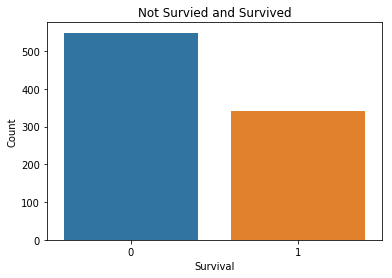

In [16]:
sbrn.countplot(train['Survived'])
mplb.title("Not Survied and Survived")
mplb.xlabel("Survival")
mplb.ylabel("Count")
mplb.show()

<span style="color:Blue"> (2)  Chart for Survival Rate by Gender </span>

In [17]:
pd.crosstab([train["Sex"], train["Survived"]], train["Sex"], margins = True).style.background_gradient(cmap = 'PuBu')

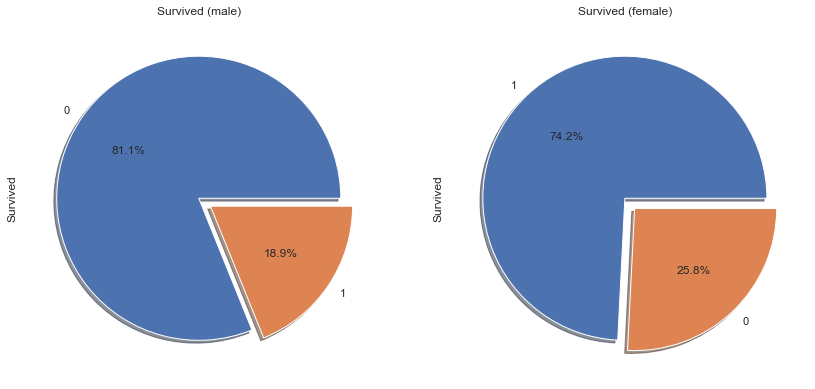

In [18]:
sbrn.set(style="whitegrid")
f,ax=mplb.subplots(1,2,figsize=(14,8))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
mplb.show()

The chart confirms 'Female' are more likely survived than 'Male'.

<span style="color:Blue"> (2)  Chart for Survival Rate by Pclass based on Gender </span>

In [19]:
pd.crosstab([train["Sex"], train["Survived"]], train["Pclass"], margins = True).style.background_gradient(cmap = 'GnBu')

The chart confirms 1st class more likely survived than other classes      
The chart confirms 3rd class more likely died than other classes

Based the above calculation lets plot a graph

First class:  216
Second class:  184
Third class:  491


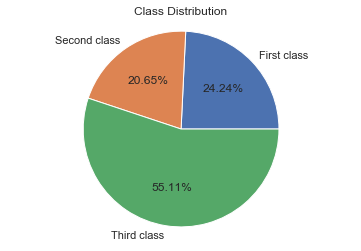

In [20]:
first_class_count = (train['Pclass']==1).sum()
print("First class: ",first_class_count)
Second_class_count = (train['Pclass']==2).sum()
print("Second class: ",Second_class_count)
Third_class_count = (train['Pclass']==3).sum()
print("Third class: ",Third_class_count)

# pie chart code

labels = ["First class","Second class","Third class"]
sizes = [first_class_count,Second_class_count,Third_class_count]
mplb.pie(sizes,labels=labels, autopct='%1.2f%%')
mplb.axis("equal")
mplb.title('Class Distribution')
mplb.show()

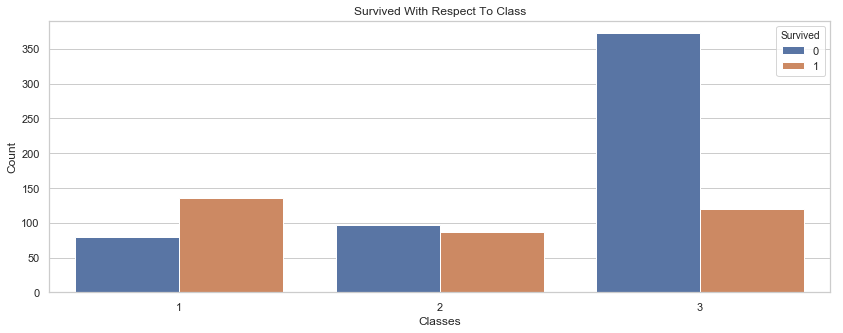

In [21]:
mplb.figure(figsize=(14,5))
sbrn.countplot(x=train["Pclass"], hue=train['Survived'])
mplb.title('Survived With Respect To Class')
mplb.xlabel("Classes")
mplb.ylabel("Count")
mplb.show()

<span style="color:Blue"> 3) Chart for Survival Rate by Age </span>

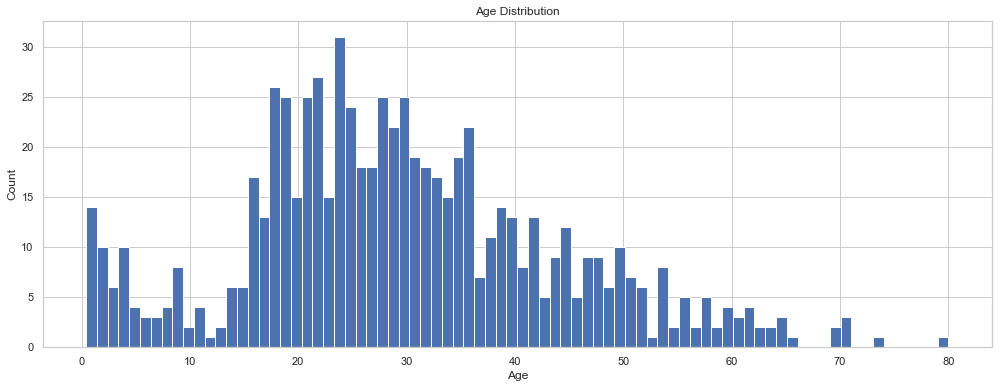

In [22]:
#mplb.figure(figsize=(14,5))
train.hist(column='Age',bins=80, figsize=(17,6))
mplb.title("Age Distribution")
mplb.xlabel("Age")
mplb.ylabel("Count")
mplb.show()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


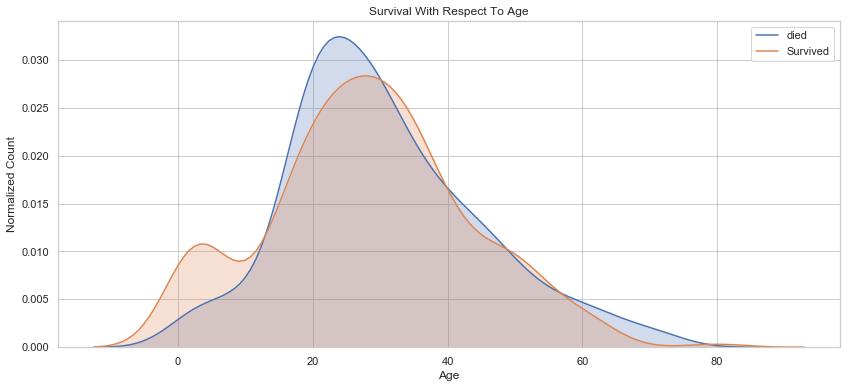

In [23]:
mplb.figure(figsize=(14,6))
axis = sbrn.kdeplot(train.Age[train.Survived == 0], shade=True, label="died")
axis = sbrn.kdeplot(train.Age[train.Survived == 1], shade=True, label="Survived")
mplb.title("Survival With Respect To Age")
mplb.xlabel("Age")
mplb.ylabel("Normalized Count")
mplb.show()

Sort the ages into logical categories

<span style="color:Blue"> 3) Chart for Survival Rate by Fare </span>

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


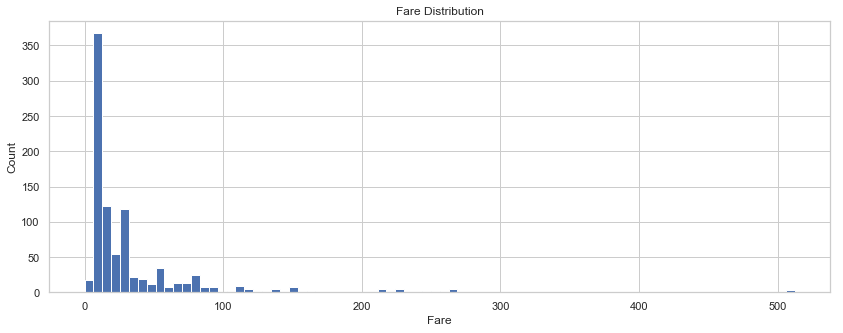

In [26]:
train.hist(column='Fare',bins=80, figsize=(14,5))
mplb.title("Fare Distribution")
mplb.xlabel("Fare")
mplb.ylabel("Count")
mplb.show()

In [27]:
Survived_above_500 = ((train['Fare'] > 500) & (train['Survived'] == 1)).sum()
print("Survived After Paying More Than 500 Dollars :", Survived_above_500)

Survived After Paying More Than 500 Dollars : 3


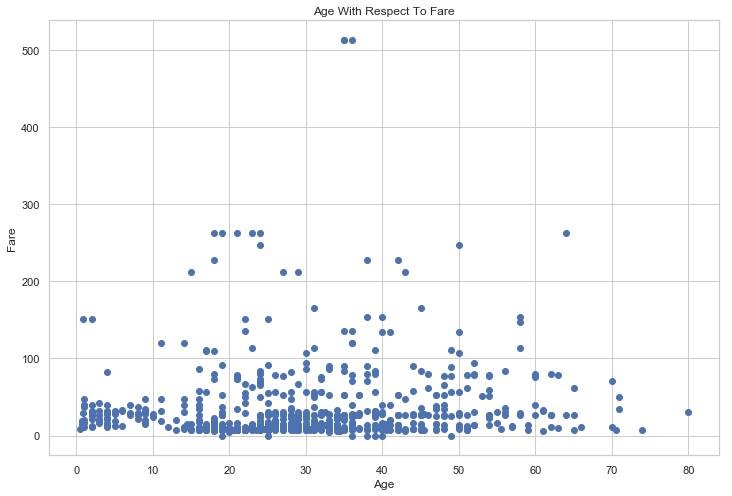

In [28]:
mplb.figure(figsize=(12,8))
mplb.scatter(train['Age'], train['Fare'])
mplb.title("Age With Respect To Fare")
mplb.xlabel("Age")
mplb.ylabel("Fare")
mplb.show()

<span style="color:Blue"> 3) Chart for Survival Rate by Embarked </span>

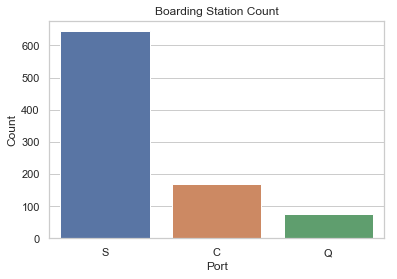

In [29]:
sbrn.countplot(x=train['Embarked'])
mplb.title("Boarding Station Count")
mplb.xlabel("Port")
mplb.ylabel("Count")
mplb.show()

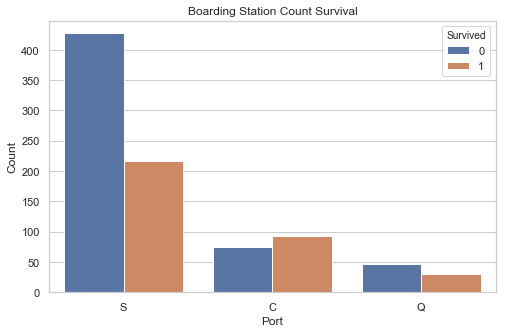

In [30]:
mplb.figure(figsize=(8,5))
sbrn.countplot(x=train['Embarked'], hue=train['Survived'])
mplb.title("Boarding Station Count Survival")
mplb.xlabel("Port")
mplb.ylabel("Count")
mplb.show()

We are done with getting required information for analysis and now start up with Processing Data

<span style="color:Red; font-size: 15pt">4. Feature Engineering (or) Processing Data</span>

Here we deal with data cleaning process Checking for problems with the collected data,
such as missing data or measurement error, data type of columns etc.  
We create new features(feature vectors) that make machine learning algorithm work   
since such representation facilitates processing and statistical analysis

<span style="color:Blue"> Missing data from train dataset </span> 

In [31]:
total_train = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_train, percent_2], axis=1, keys=['Total', 'Percentage'])
missing_data.head(5)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


Here as per analysis of missing values in the train dataset are : 

   cabin - 687 values - Here 77% of major values are missing hence we will delete the column.  
   Age - 177 values - since age has the baised result you can use the 'median value' to replace the result.  
   Embarked - 2 values - Replace the empty value with 'S' value

<span style="color:Blue"> Missing data from test dataset </span>

In [32]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_2], axis=1, keys=['Total', 'Pecentage'])
missing_data.head(5)

,Total,Pecentage
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


Here as per analysis of missing values in the train dataset are : 

   cabin - 327 values - Here 78% of major values are missing hence we will delete the column.  
   Age - 86 values - since age has the baised result you can use the 'median value' to replace the result.  
   Embarked - 1 value - Replace the empty value with the 'median value'.

<span style="color:Blue"> Cabin Feature </span>

We will start off by dropping the cabin feature since not a lot more useful information can be extracted from it

In [33]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

<span style="color:Blue"> Ticket Feature </span>

We can also drop the ticket feature since it's unlikely to yeild any useful information

In [34]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [35]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


<span style="color:Blue"> Embarked Feature </span>

Now we need to fill in the missing values in the Embarked feature

In [36]:
print("Number of people embarking in southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in southampton (S):
644
Number of people embarking in cherbourg (C):
168
Number of people embarking in queenstown (Q):
77


it is clear that the majority of people embarked on Southampton(S).                                                            Lets go ahead and fill in the missing values with S  

In [37]:
train = train.fillna({"Embarked": "S"})

<span style="color:Blue"> Title Feature (Creating a new feature extracting from existing)</span>

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival,<br>
before dropping "Name" and "PassengerId" features.<br>
In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.)<br>
matches the first word which ends with dot charcter within name feature The expand=False flag returns a Data Frame

Observation

When we plot Title,Age and Survived, we note the following observations.<br>
* Most titles band age groups accurately <br>
for example: Master title has Age mean of 5 years
* Survival among title Age bands varies sligtly.<br>
* Certain titles mostly survived (Mme,Lady,Sir)or did not(Don,Rev,Jonkheer)

Decision

We Decide to retain the new Title feature for model training

In [38]:
combine = [train, test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [39]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.

In [40]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')

In [41]:
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


Map each of the title groups to a numerical value

In [42]:
title_mapping = {"Mr" : 1,"Miss" : 2,"Mrs" : 3,"Master" : 4,"Royal" : 5,"Rare" : 6,}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

<span style="color:Blue"> Age Feature </span>

Lets use Title's median age for missing age

In [43]:
# Fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [44]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1,0,5,12,18,24,35,60,npy.inf]
labels = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)

Now that we have filled in the missing values at least somewhat accurately. Its time to map each age group to numerical value

In [45]:
age_mapping = {'Baby':1,'Child':2, 'Teenager':3,'Student':4,'Young Adult':5,'Adult':6, 'Senior':7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null int64
AgeGroup       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


Now drop the Age feature

In [47]:
#train = train.drop(['Age '], axis = 1)
#test = test.drop(['Age '], axis = 1)

<span style="color:Blue"> Name Feature </span>

We can drop the name feature now that we have extracted the titles

In [48]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [49]:
# Drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

<span style="color:Blue"> Sex Feature </span>

In [50]:
# Map each sex value to the numerical value
sex_mapping = {"male" : 0, "female" : 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

<span style="color:Blue"> Embarked Feature </span>

In [51]:
# Map each embarked value to the numerical value
embarked_mapping = {"S" : 1, "C" : 2,  "Q" : 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,1,1,4
1,2,1,1,1,1,0,71.2833,2,3,6
2,3,1,3,1,0,0,7.9250,1,2,5
3,4,1,1,1,1,0,53.1000,1,3,5
4,5,0,3,0,0,0,8.0500,1,1,5


<span style="color:Blue"> Fare Feature </span>

Its time separate the fare values into some logical group as well as filling in the single missing value in the test dataset

In [53]:
# Fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(),4)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [54]:
# Map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand'] = pd.qcut(train['Fare'],4,labels=[1,2,3,4])

In [55]:
# Drop Fare values
train = train.drop(['Fare'],axis=1)
test = test.drop(['Fare'],axis=1)

In [56]:
# Drop PassengerId values
# train = train.drop(['PassengerId'],axis=1)
# test = test.drop(['PassengerId'],axis=1)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,1,4,1
1,2,1,1,1,1,0,2,3,6,4
2,3,1,3,1,0,0,1,2,5,2
3,4,1,1,1,1,0,1,3,5,4
4,5,0,3,0,0,0,1,1,5,2


In [58]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,892,3,0,0,0,3,1,5,1
1,893,3,1,1,0,1,3,6,4
2,894,2,0,0,0,3,1,7,2
3,895,3,0,0,0,1,1,5,4
4,896,3,1,1,1,1,3,4,2


<span style="color:Red; font-size: 15pt">5. Data Classifiers</span>

In [59]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<span style="color:Blue"> Splitting the training data </span>

We will use part of our training data(22% in this case) to test the accuracy of our different models

In [60]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived','PassengerId'],axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val =train_test_split(predictors, target, test_size = 0.22, random_state = 0)

<span style="color:Blue"> Gaussian Naive Bayes </span>

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

y_pred1 = gaussian.predict(x_val)

acc_gaussian = round(accuracy_score(y_pred1, y_val) * 100, 2)
print(acc_gaussian)

78.68


<span style="color:Blue"> Logistic Regression </span>

In [62]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred2 = logreg.predict(x_val)

acc_logreg = round(accuracy_score(y_pred2, y_val) * 100, 2)
print(acc_logreg)

79.7


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<span style="color:Blue"> Support Vector Machine </span>

In [63]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

y_pred3 = svc.predict(x_val)

acc_svc = round(accuracy_score(y_pred3, y_val) * 100, 2)
print(acc_svc)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.23


<span style="color:Blue"> Linear SVC </span>

In [64]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train,y_train)

y_pred4 = linear_svc.predict(x_val)

acc_linear_svc = round(accuracy_score(y_pred4, y_val) * 100, 2)
print(acc_linear_svc)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.17


<span style="color:Blue"> Perceptron </span>

In [65]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train,y_train)

y_pred5 = perceptron.predict(x_val)

acc_perceptron = round(accuracy_score(y_pred5, y_val) * 100, 2)
print(acc_perceptron)

74.62


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


<span style="color:Blue"> Decision Tree </span>

In [66]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)

y_pred6 = decisiontree.predict(x_val)

acc_decisiontree = round(accuracy_score(y_pred6, y_val) * 100, 2)
print(acc_decisiontree)

81.73


<span style="color:Blue"> Random Forest </span>

In [67]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train,y_train)

y_pred7 = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred7, y_val) * 100, 2)
print(acc_randomforest)

83.76


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<span style="color:Blue"> K-Nearest Neigbors </span>

In [68]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)

y_pred8 = Knn.predict(x_val)

acc_Knn = round(accuracy_score(y_pred8, y_val) * 100, 2)
print(acc_Knn)

79.19


<span style="color:Blue"> Stochastic Gradient Descent </span>

In [69]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train,y_train)

y_pred9 = sgd.predict(x_val)

acc_sgd = round(accuracy_score(y_pred9, y_val) * 100, 2)
print(acc_sgd)

78.68


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


<span style="color:Blue"> Gradient Boosting Classifier </span>

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_pred10 = gbc.predict(x_val)

acc_gbc = round(accuracy_score(y_pred10, y_val) * 100, 2)
print(acc_gbc)

82.74


Lets compare the accuracies of each model !

In [72]:
models = pd.DataFrame({'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes',
                              'Perceptron', 'Linear SVC', 'Decision Tree', 'Stochastic Gradient Descent', 
                               'Gradient Boosting Classifer'],
                   'Score' : [acc_svc, acc_Knn, acc_logreg, acc_randomforest, acc_gaussian, acc_perceptron, acc_linear_svc, 
                              acc_decisiontree, acc_sgd, acc_gbc]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,83.76
9,Gradient Boosting Classifer,82.74
0,Support Vector Machines,82.23
7,Decision Tree,81.73
2,Logistic Regression,79.70
1,KNN,79.19
4,Naive Bayes,78.68
8,Stochastic Gradient Descent,78.68
6,Linear SVC,78.17
5,Perceptron,74.62


I decided to use the Random Forest model for the testing model

<span style="color:Red; font-size: 15pt">6. Creating Submission</span>

In [74]:
# set ids as passengerid and predict survival
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId',axis=1))

In [75]:
# set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({'PassengerId' : ids, 'Survived' : predictions})
output.to_csv('Submission.csv', index=False)